In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


In [325]:
# Classifier Libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, recall_score, classification_report
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, precision_recall_curve

In [326]:
df_cust = pd.read_csv('customer.csv')
print(df_cust.shape)
df_cust.head()

(1000, 8)


,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[29, 87, 144, 241, 330, 858, 996, 1028, 1067, ...",22
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[5, 160, 242, 378, 431, 475, 571, 762, 876, 93...",20
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[316, 406, 447, 523, 968, 1200, 1318, 1365, 16...",10
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[65, 94, 113, 364, 401, 433, 485, 651, 672, 77...",17
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[372, 614, 774, 1362, 1446, 1564, 1637, 1939]",8


In [327]:
df_ter = pd.read_csv('terminal.csv')
print(df_ter.shape)
df_ter.head()

(2000, 3)


,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,41.702200,72.032449
1,1,0.011437,30.233257
2,2,14.675589,9.233859
3,3,18.626021,34.556073
4,4,39.676747,53.881673


In [328]:
df_train = pd.read_csv('train.csv')
print(df_train.shape)
df_train.head()

(291231, 6)


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
0,59383,2021-08-01 00:04:37,323,217,4.60,0
1,59384,2021-08-01 00:12:10,6,429,8.61,0
2,59385,2021-08-01 00:12:34,714,1011,64.00,0
3,59386,2021-08-01 00:15:40,266,1969,12.72,0
4,59387,2021-08-01 00:16:01,890,1482,98.88,0


In [329]:
df_train[df_train["TX_FRAUD"]==1] #fraudulent

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
8,59391,2021-08-01 00:32:04,220,828,76.25,1
268,59651,2021-08-01 06:29:19,74,531,228.58,1
327,59710,2021-08-01 07:01:39,580,1084,71.79,1
346,59729,2021-08-01 07:16:18,975,423,36.26,1
413,59796,2021-08-01 07:48:07,679,1893,38.80,1
...,...,...,...,...,...,...
291073,350456,2021-12-30 19:30:45,311,895,60.12,1
291113,350496,2021-12-30 20:06:08,359,1193,62.77,1
291155,350538,2021-12-30 21:04:38,764,144,10.36,1
291165,350548,2021-12-30 21:23:21,2,1365,94.92,1


In [330]:
df_train[df_train["TX_FRAUD"]==0] #legitimate

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
0,59383,2021-08-01 00:04:37,323,217,4.60,0
1,59384,2021-08-01 00:12:10,6,429,8.61,0
2,59385,2021-08-01 00:12:34,714,1011,64.00,0
3,59386,2021-08-01 00:15:40,266,1969,12.72,0
4,59387,2021-08-01 00:16:01,890,1482,98.88,0
...,...,...,...,...,...,...
291226,350609,2021-12-30 23:33:02,221,41,61.26,0
291227,350610,2021-12-30 23:46:15,101,761,58.80,0
291228,350611,2021-12-30 23:54:38,7,1991,15.08,0
291229,350612,2021-12-30 23:56:36,161,1166,54.24,0


In [331]:
df_train_merge = pd.merge(df_train, df_cust, left_on='CUSTOMER_ID', right_on='CUSTOMER_ID')
df_train_merge

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
0,59383,2021-08-01 00:04:37,323,217,4.60,0,84.515409,38.276422,7.353061,3.676530,3.324124,"[51, 68, 208, 217, 293, 353, 534, 717, 773, 86...",19
1,59384,2021-08-01 00:12:10,6,429,8.61,0,11.827443,63.992102,18.618562,9.309281,3.778676,"[163, 172, 205, 429, 468, 607, 750, 786, 881, ...",16
2,59385,2021-08-01 00:12:34,714,1011,64.00,0,75.221083,94.991427,82.620413,41.310207,3.723765,"[58, 799, 1011, 1021, 1228, 1347, 1443, 1462, ...",13
3,59386,2021-08-01 00:15:40,266,1969,12.72,0,51.122179,8.329098,9.852171,4.926085,3.862067,"[27, 493, 584, 734, 820, 917, 1108, 1363, 1444...",15
4,59387,2021-08-01 00:16:01,890,1482,98.88,0,62.777887,31.405270,83.660035,41.830018,3.128315,"[154, 177, 351, 444, 633, 739, 1018, 1056, 113...",20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291226,350609,2021-12-30 23:33:02,221,41,61.26,0,79.559037,34.453046,78.232912,39.116456,2.943576,"[41, 68, 207, 232, 273, 293, 441, 695, 696, 70...",14
291227,350610,2021-12-30 23:46:15,101,761,58.80,0,86.948853,45.416240,36.036584,18.018292,0.930977,"[208, 353, 357, 373, 457, 524, 534, 537, 761, ...",17
291228,350611,2021-12-30 23:54:38,7,1991,15.08,0,52.184832,41.466194,30.132783,15.066392,3.096935,"[563, 612, 700, 705, 859, 1036, 1231, 1442, 14...",15
291229,350612,2021-12-30 23:56:36,161,1166,54.24,0,38.033518,14.780868,70.068772,35.034386,2.627048,"[37, 325, 408, 440, 598, 655, 724, 806, 1034, ...",14


In [332]:
df_train_merge = pd.merge(df_train_merge, df_ter, left_on='TERMINAL_ID', right_on='TERMINAL_ID')
df_train_merge

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals,x_terminal_id,y_terminal_id
0,59383,2021-08-01 00:04:37,323,217,4.60,0,84.515409,38.276422,7.353061,3.676530,3.324124,"[51, 68, 208, 217, 293, 353, 534, 717, 773, 86...",19,80.316334,40.239252
1,59384,2021-08-01 00:12:10,6,429,8.61,0,11.827443,63.992102,18.618562,9.309281,3.778676,"[163, 172, 205, 429, 468, 607, 750, 786, 881, ...",16,15.172487,63.912685
2,59385,2021-08-01 00:12:34,714,1011,64.00,0,75.221083,94.991427,82.620413,41.310207,3.723765,"[58, 799, 1011, 1021, 1228, 1347, 1443, 1462, ...",13,74.196424,98.288079
3,59386,2021-08-01 00:15:40,266,1969,12.72,0,51.122179,8.329098,9.852171,4.926085,3.862067,"[27, 493, 584, 734, 820, 917, 1108, 1363, 1444...",15,51.950635,6.563484
4,59387,2021-08-01 00:16:01,890,1482,98.88,0,62.777887,31.405270,83.660035,41.830018,3.128315,"[154, 177, 351, 444, 633, 739, 1018, 1056, 113...",20,62.417972,26.483666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291226,350609,2021-12-30 23:33:02,221,41,61.26,0,79.559037,34.453046,78.232912,39.116456,2.943576,"[41, 68, 207, 232, 273, 293, 441, 695, 696, 70...",14,75.094243,34.889834
291227,350610,2021-12-30 23:46:15,101,761,58.80,0,86.948853,45.416240,36.036584,18.018292,0.930977,"[208, 353, 357, 373, 457, 524, 534, 537, 761, ...",17,84.993054,43.465479
291228,350611,2021-12-30 23:54:38,7,1991,15.08,0,52.184832,41.466194,30.132783,15.066392,3.096935,"[563, 612, 700, 705, 859, 1036, 1231, 1442, 14...",15,51.314901,42.942203
291229,350612,2021-12-30 23:56:36,161,1166,54.24,0,38.033518,14.780868,70.068772,35.034386,2.627048,"[37, 325, 408, 440, 598, 655, 724, 806, 1034, ...",14,38.411423,14.674793


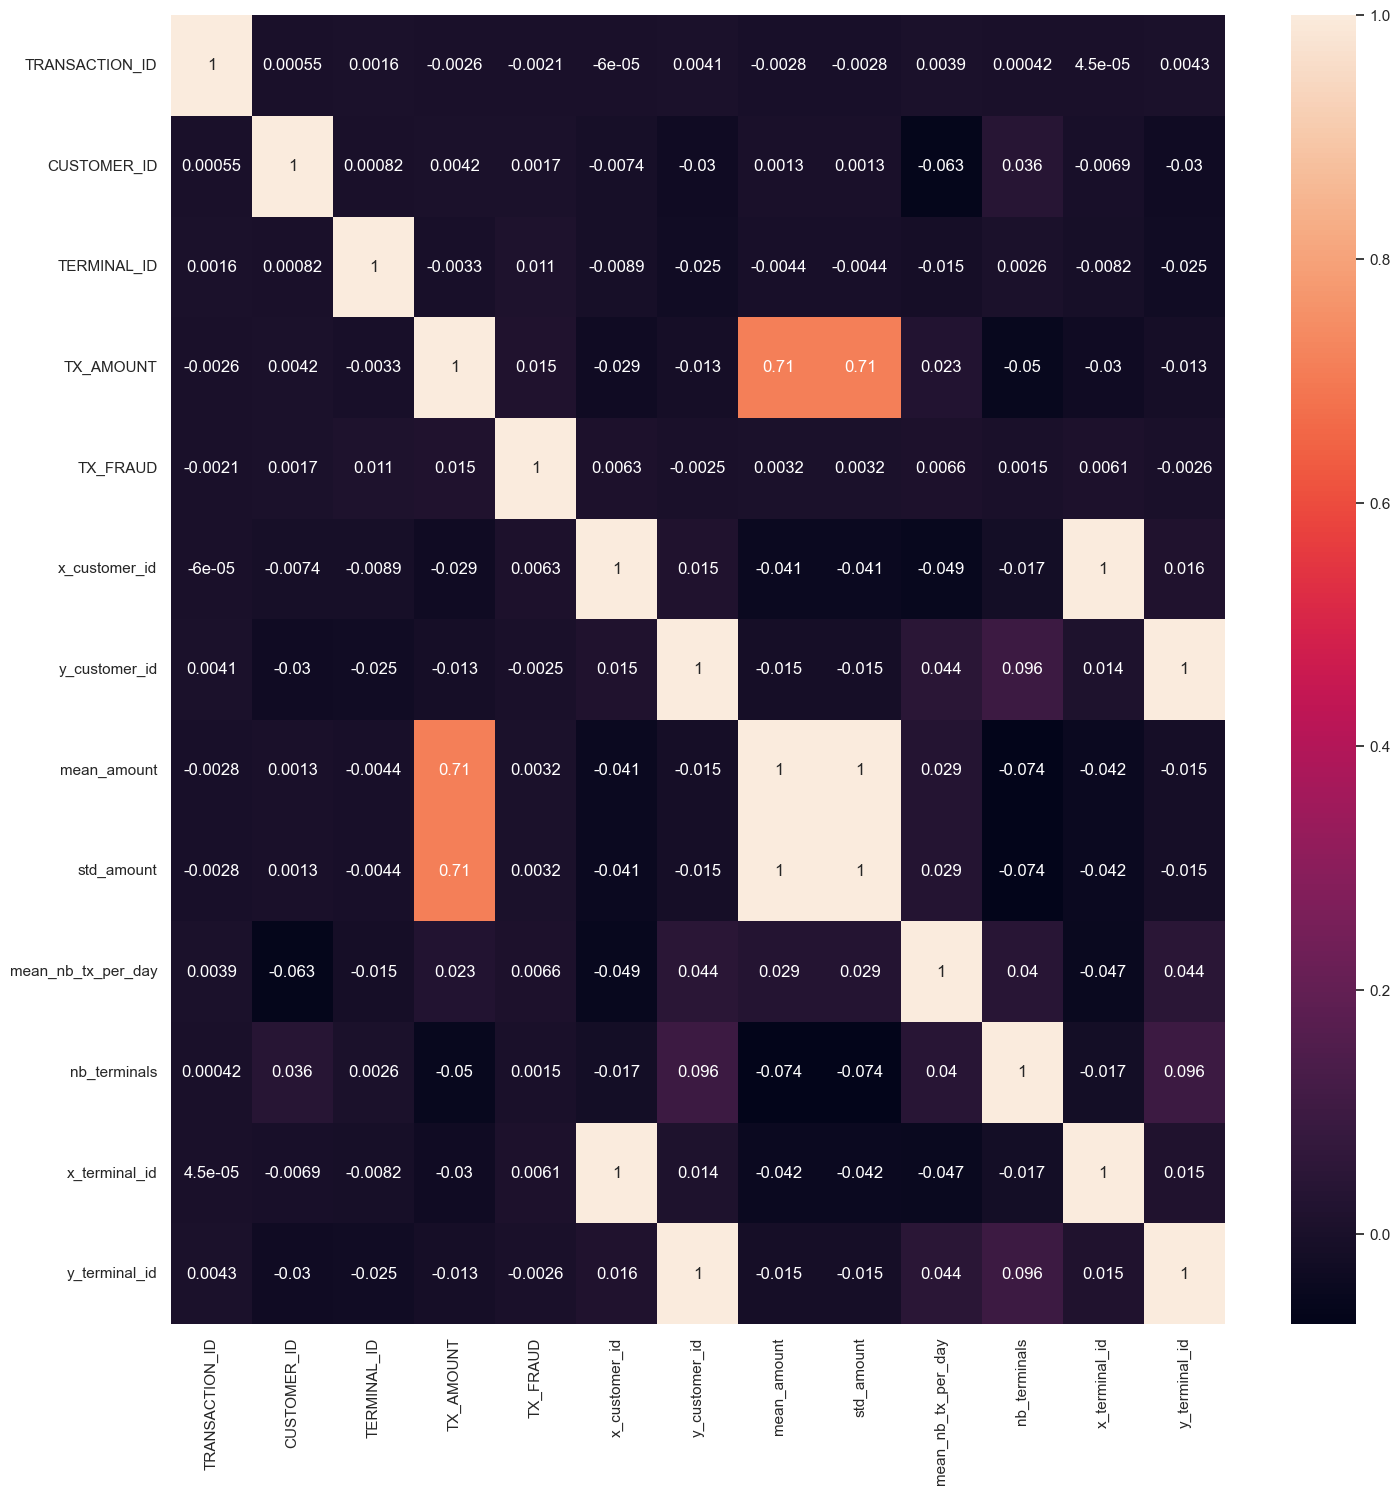

In [333]:
corr = df_train_merge.corr(numeric_only=True) 

#make the heatmap larger in size
# plt.figure(figsize = (7,7))
plt.figure(figsize = (17,17))

sns.heatmap(corr, annot=True)
plt.show()

In [334]:
df_train_merge.describe()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,x_terminal_id,y_terminal_id
count,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000
mean,204998.000000,496.256202,993.718526,53.182274,0.022601,50.184880,50.429252,51.710394,25.855197,2.650934,15.300318,50.218904,50.392889
std,84071.292461,285.274966,575.267551,39.573329,0.148627,28.732398,28.416998,27.475610,13.737805,0.961907,4.190001,28.682009,28.376333
min,59383.000000,0.000000,0.000000,0.000000,0.000000,0.007245,0.036734,5.063101,2.531550,0.018782,2.000000,0.011437,0.009695
25%,132190.500000,249.000000,496.000000,21.130000,0.000000,25.868407,27.459470,28.606102,14.303051,1.956902,12.000000,25.983398,27.692306
50%,204998.000000,498.000000,1000.000000,44.770000,0.000000,48.968491,49.236141,51.641807,25.820903,2.836935,15.000000,49.264044,49.074012
75%,277805.500000,741.000000,1483.000000,76.850000,0.000000,74.735746,75.945025,75.288972,37.644486,3.438147,18.000000,75.012425,75.563328
max,350613.000000,999.000000,1999.000000,291.150000,1.000000,99.994897,99.996402,99.981815,49.990907,3.999725,28.000000,99.859909,99.987579


In [335]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print( df_train_merge.TX_FRAUD.value_counts().rename(index = class_names) )

TX_FRAUD
Not Fraud    284649
Fraud          6582
Name: count, dtype: int64


In [336]:
x = df_train_merge.drop('TX_FRAUD', axis='columns')

x = x.drop('TRANSACTION_ID', axis='columns')
x = x.drop('TX_DATETIME', axis='columns')
x = x.drop('available_terminals', axis='columns')

# x = x.drop('mean_amount', axis='columns')
# x = x.drop('std_amount', axis='columns')


y = df_train_merge['TX_FRAUD']
x

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,x_terminal_id,y_terminal_id
0,323,217,4.60,84.515409,38.276422,7.353061,3.676530,3.324124,19,80.316334,40.239252
1,6,429,8.61,11.827443,63.992102,18.618562,9.309281,3.778676,16,15.172487,63.912685
2,714,1011,64.00,75.221083,94.991427,82.620413,41.310207,3.723765,13,74.196424,98.288079
3,266,1969,12.72,51.122179,8.329098,9.852171,4.926085,3.862067,15,51.950635,6.563484
4,890,1482,98.88,62.777887,31.405270,83.660035,41.830018,3.128315,20,62.417972,26.483666
...,...,...,...,...,...,...,...,...,...,...,...
291226,221,41,61.26,79.559037,34.453046,78.232912,39.116456,2.943576,14,75.094243,34.889834
291227,101,761,58.80,86.948853,45.416240,36.036584,18.018292,0.930977,17,84.993054,43.465479
291228,7,1991,15.08,52.184832,41.466194,30.132783,15.066392,3.096935,15,51.314901,42.942203
291229,161,1166,54.24,38.033518,14.780868,70.068772,35.034386,2.627048,14,38.411423,14.674793


In [337]:
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.001)
# x_train, x_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, test_size=0.20, random_state=1)

print("Length of x_train is: {x_train}".format(x_train = len(x_train)))
print("Length of x_test is: {x_test}".format(x_test = len(x_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of x_train is: 232984
Length of x_test is: 58247
Length of y_train is: 232984
Length of y_test is: 58247


In [338]:
x_train

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,x_terminal_id,y_terminal_id
249665,811,279,39.14,74.738178,15.570077,50.277373,25.138686,3.749174,12,77.014996,13.033578
175801,575,300,44.15,68.232658,80.570234,68.785617,34.392808,1.689630,13,67.456402,79.977654
149883,613,1158,126.97,86.758085,31.309888,59.776532,29.888266,1.706286,15,85.405979,27.084491
285404,674,1330,73.09,33.758138,60.916405,78.716052,39.358026,0.304581,13,30.803699,58.696221
251375,720,1482,127.99,63.288532,26.646128,91.410354,45.705177,3.043768,21,62.417972,26.483666
...,...,...,...,...,...,...,...,...,...,...,...
21440,917,1104,87.57,48.949721,77.939096,78.988969,39.494484,3.903215,21,49.756438,82.117696
117583,202,1130,28.67,89.754276,76.996719,38.955342,19.477671,2.486662,13,92.310068,74.616014
73349,137,1298,55.07,50.980720,33.396487,80.129816,40.064908,0.388972,23,52.716018,28.807959
267336,761,1099,86.02,26.054764,55.994741,50.430486,25.215243,1.783891,16,29.299788,57.749068


In [339]:
y_train

249665    0
175801    0
149883    0
285404    0
251375    0
         ..
21440     0
117583    0
73349     0
267336    0
128037    0
Name: TX_FRAUD, Length: 232984, dtype: int64

In [340]:
class_names = {0:'Not Fraud', 1:'Fraud'}
series_counts = y_train.value_counts()
series_counts_renamed = series_counts.rename(index=class_names)
print( series_counts_renamed )

TX_FRAUD
Not Fraud    227725
Fraud          5259
Name: count, dtype: int64


In [341]:
x_test

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,x_terminal_id,y_terminal_id
136825,743,1647,10.43,36.504355,26.768404,13.897767,6.948883,1.122826,17,31.991506,28.624779
202454,505,879,42.23,3.521980,18.066062,37.158877,18.579438,2.309985,18,4.939638,15.045503
36366,95,1516,70.58,85.772264,45.722345,95.428075,47.714038,2.303005,19,84.217912,42.461271
220554,733,503,138.11,4.238788,30.115520,85.929915,42.964958,2.638782,12,4.147508,32.182880
109088,515,637,44.85,39.362975,37.554936,58.975413,29.487707,2.671908,10,42.879516,38.210064
...,...,...,...,...,...,...,...,...,...,...,...
34041,923,708,15.13,95.019247,99.449593,40.577015,20.288508,1.842709,6,95.739493,95.947061
91655,638,12,23.33,88.382545,85.344933,38.844052,19.422026,3.028519,15,87.638915,89.460666
163962,154,547,19.80,59.102690,65.917647,42.739391,21.369695,3.997112,15,59.898529,61.570429
193945,75,1862,16.24,90.655550,77.404733,36.648789,18.324395,0.324406,14,93.348046,80.832697


In [342]:
y_test

136825    0
202454    0
36366     0
220554    0
109088    0
         ..
34041     0
91655     0
163962    0
193945    0
213946    0
Name: TX_FRAUD, Length: 58247, dtype: int64

In [343]:
class_names = {0:'Not Fraud', 1:'Fraud'}
series_counts = y_test.value_counts()
series_counts_renamed = series_counts.rename(index=class_names)
print( series_counts_renamed )

TX_FRAUD
Not Fraud    56924
Fraud         1323
Name: count, dtype: int64


In [344]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [345]:
xgb.save_model("C:/dataset/model_XGBClassifier_001.json");

In [346]:
# xgb = XGBClassifier()
# xgb.load_model("C:/dataset/model_XGBClassifier_001.json");

In [347]:
y_pred = xgb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     56924
           1       0.11      0.00      0.00      1323

    accuracy                           0.98     58247
   macro avg       0.54      0.50      0.50     58247
weighted avg       0.96      0.98      0.97     58247



In [348]:
# Accuracy
accuracy_score(y_pred, y_test)

0.9769086819922056

In [373]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.023091318007794393
Mean Squared Error: 0.023091318007794393
Root Mean Squared Error: 0.15195827719408506


In [349]:
confusion_m = confusion_matrix(y_test, y_pred)
confusion_m

array([[56899,    25],
       [ 1320,     3]], dtype=int64)

<Axes: >

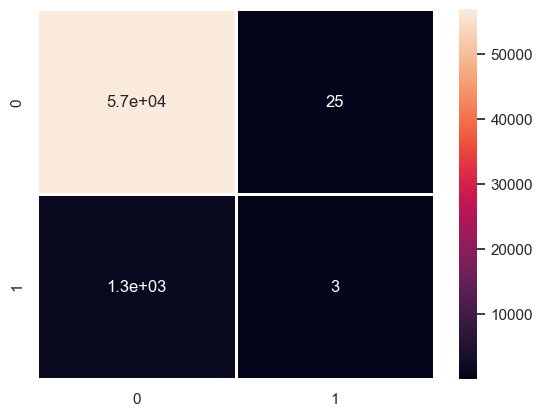

In [350]:
sns.heatmap(confusion_m, annot=True, linecolor='white', linewidths=1)

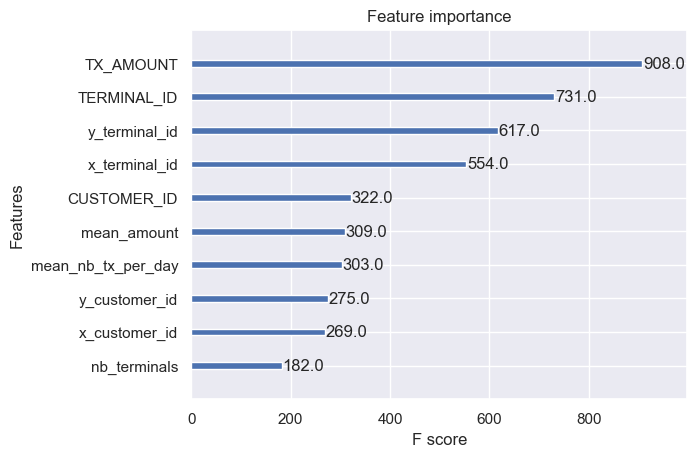

In [351]:
plot_importance(xgb)
plt.show()

In [352]:
ytrain_pred = xgb.predict(x_train)
print(classification_report(y_train, ytrain_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    227725
           1       0.81      0.02      0.04      5259

    accuracy                           0.98    232984
   macro avg       0.89      0.51      0.51    232984
weighted avg       0.97      0.98      0.97    232984



In [353]:
ytrain_pred
ytrain_pred_df = pd.DataFrame(ytrain_pred, columns=['TX_FRAUD'])
ytrain_pred_df

,TX_FRAUD
0,0
1,0
2,0
3,0
4,0
...,...
232979,0
232980,0
232981,0
232982,0


In [354]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print( ytrain_pred_df.TX_FRAUD.value_counts().rename(index = class_names) )

TX_FRAUD
Not Fraud    232854
Fraud           130
Name: count, dtype: int64


=====================================================================================================

In [355]:
df_test = pd.read_csv('test.csv')
print(df_test.shape)
df_test.head()

(226731, 5)


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT
0,352590,2022-01-01 00:03:14,208,640,147.24
1,352591,2022-01-01 00:26:39,851,315,13.27
2,352592,2022-01-01 00:30:30,454,27,70.52
3,352593,2022-01-01 00:31:31,677,1573,44.75
4,352594,2022-01-01 00:56:18,322,1398,37.60


In [356]:
df_test_merge = pd.merge(df_test, df_cust, left_on='CUSTOMER_ID', right_on='CUSTOMER_ID')
df_test_merge

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
0,352590,2022-01-01 00:03:14,208,640,147.24,72.788816,63.746228,82.134163,41.067082,1.917538,"[173, 343, 439, 631, 640, 871, 935, 1170, 1260...",14
1,352591,2022-01-01 00:26:39,851,315,13.27,30.243124,74.364272,46.525169,23.262584,1.675154,"[295, 315, 499, 766, 1015, 1168, 1367, 1379, 1...",11
2,352592,2022-01-01 00:30:30,454,27,70.52,48.776456,1.331611,62.594881,31.297441,3.956352,"[27, 443, 454, 512, 676, 734, 1186, 1299, 1363...",10
3,352593,2022-01-01 00:31:31,677,1573,44.75,60.207552,59.042148,56.856095,28.428048,3.756383,"[84, 103, 128, 314, 547, 797, 824, 983, 1075, ...",19
4,352594,2022-01-01 00:56:18,322,1398,37.60,5.105306,33.126888,35.430997,17.715499,3.787229,"[89, 187, 269, 466, 503, 551, 606, 639, 710, 7...",20
...,...,...,...,...,...,...,...,...,...,...,...,...
226726,579316,2022-04-29 23:52:18,27,914,52.01,22.308163,95.274901,47.476911,23.738455,3.385635,"[302, 380, 450, 521, 525, 657, 719, 833, 850, ...",16
226727,579317,2022-04-29 23:52:23,947,1281,136.96,60.740656,21.581337,86.840239,43.420120,3.217332,"[76, 90, 121, 723, 829, 863, 915, 918, 933, 10...",19
226728,579318,2022-04-29 23:54:38,537,1636,15.87,84.773933,56.139872,72.758371,36.379186,3.927457,"[62, 169, 260, 335, 553, 618, 895, 951, 1025, ...",19
226729,579319,2022-04-29 23:54:39,1,936,35.13,42.365480,64.589411,46.570785,23.285393,3.567092,"[5, 160, 242, 378, 431, 475, 571, 762, 876, 93...",20


In [357]:
df_test_merge = pd.merge(df_test_merge, df_ter, left_on='TERMINAL_ID', right_on='TERMINAL_ID')
df_test_merge

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals,x_terminal_id,y_terminal_id
0,352590,2022-01-01 00:03:14,208,640,147.24,72.788816,63.746228,82.134163,41.067082,1.917538,"[173, 343, 439, 631, 640, 871, 935, 1170, 1260...",14,74.170480,61.501572
1,352591,2022-01-01 00:26:39,851,315,13.27,30.243124,74.364272,46.525169,23.262584,1.675154,"[295, 315, 499, 766, 1015, 1168, 1367, 1379, 1...",11,29.548229,73.160647
2,352592,2022-01-01 00:30:30,454,27,70.52,48.776456,1.331611,62.594881,31.297441,3.956352,"[27, 443, 454, 512, 676, 734, 1186, 1299, 1363...",10,49.157316,5.336255
3,352593,2022-01-01 00:31:31,677,1573,44.75,60.207552,59.042148,56.856095,28.428048,3.756383,"[84, 103, 128, 314, 547, 797, 824, 983, 1075, ...",19,64.603026,60.509913
4,352594,2022-01-01 00:56:18,322,1398,37.60,5.105306,33.126888,35.430997,17.715499,3.787229,"[89, 187, 269, 466, 503, 551, 606, 639, 710, 7...",20,8.895911,32.670126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226726,579316,2022-04-29 23:52:18,27,914,52.01,22.308163,95.274901,47.476911,23.738455,3.385635,"[302, 380, 450, 521, 525, 657, 719, 833, 850, ...",16,24.294713,91.384388
226727,579317,2022-04-29 23:52:23,947,1281,136.96,60.740656,21.581337,86.840239,43.420120,3.217332,"[76, 90, 121, 723, 829, 863, 915, 918, 933, 10...",19,57.507017,21.478254
226728,579318,2022-04-29 23:54:38,537,1636,15.87,84.773933,56.139872,72.758371,36.379186,3.927457,"[62, 169, 260, 335, 553, 618, 895, 951, 1025, ...",19,87.668581,56.148648
226729,579319,2022-04-29 23:54:39,1,936,35.13,42.365480,64.589411,46.570785,23.285393,3.567092,"[5, 160, 242, 378, 431, 475, 571, 762, 876, 93...",20,46.755005,66.694254


In [358]:

xx = df_test_merge.drop('TRANSACTION_ID', axis='columns')
xx = xx.drop('TX_DATETIME', axis='columns')
xx = xx.drop('available_terminals', axis='columns')

# xx = xx.drop('mean_amount', axis='columns')
# xx = xx.drop('std_amount', axis='columns')


# yy = df_test['TX_FRAUD']
xx

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,x_terminal_id,y_terminal_id
0,208,640,147.24,72.788816,63.746228,82.134163,41.067082,1.917538,14,74.170480,61.501572
1,851,315,13.27,30.243124,74.364272,46.525169,23.262584,1.675154,11,29.548229,73.160647
2,454,27,70.52,48.776456,1.331611,62.594881,31.297441,3.956352,10,49.157316,5.336255
3,677,1573,44.75,60.207552,59.042148,56.856095,28.428048,3.756383,19,64.603026,60.509913
4,322,1398,37.60,5.105306,33.126888,35.430997,17.715499,3.787229,20,8.895911,32.670126
...,...,...,...,...,...,...,...,...,...,...,...
226726,27,914,52.01,22.308163,95.274901,47.476911,23.738455,3.385635,16,24.294713,91.384388
226727,947,1281,136.96,60.740656,21.581337,86.840239,43.420120,3.217332,19,57.507017,21.478254
226728,537,1636,15.87,84.773933,56.139872,72.758371,36.379186,3.927457,19,87.668581,56.148648
226729,1,936,35.13,42.365480,64.589411,46.570785,23.285393,3.567092,20,46.755005,66.694254


In [359]:
yy_pred = xgb.predict(xx)
yy_pred

array([0, 0, 0, ..., 0, 0, 0])

In [360]:
yy_pred_df = pd.DataFrame(yy_pred, columns=['TX_FRAUD'])
yy_pred_df

,TX_FRAUD
0,0
1,0
2,0
3,0
4,0
...,...
226726,0
226727,0
226728,0
226729,0


In [361]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(yy_pred_df.TX_FRAUD.value_counts().rename(index = class_names))

TX_FRAUD
Not Fraud    226626
Fraud           105
Name: count, dtype: int64


In [362]:
result = pd.concat([xx, yy_pred_df], axis=1)
result

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,x_terminal_id,y_terminal_id,TX_FRAUD
0,208,640,147.24,72.788816,63.746228,82.134163,41.067082,1.917538,14,74.170480,61.501572,0
1,851,315,13.27,30.243124,74.364272,46.525169,23.262584,1.675154,11,29.548229,73.160647,0
2,454,27,70.52,48.776456,1.331611,62.594881,31.297441,3.956352,10,49.157316,5.336255,0
3,677,1573,44.75,60.207552,59.042148,56.856095,28.428048,3.756383,19,64.603026,60.509913,0
4,322,1398,37.60,5.105306,33.126888,35.430997,17.715499,3.787229,20,8.895911,32.670126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
226726,27,914,52.01,22.308163,95.274901,47.476911,23.738455,3.385635,16,24.294713,91.384388,0
226727,947,1281,136.96,60.740656,21.581337,86.840239,43.420120,3.217332,19,57.507017,21.478254,0
226728,537,1636,15.87,84.773933,56.139872,72.758371,36.379186,3.927457,19,87.668581,56.148648,0
226729,1,936,35.13,42.365480,64.589411,46.570785,23.285393,3.567092,20,46.755005,66.694254,0


In [363]:
result[result["TX_FRAUD"]==1]

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,x_terminal_id,y_terminal_id,TX_FRAUD
3897,74,634,196.95,9.784448,86.219152,97.427351,48.713676,3.843339,17,6.748934,88.053860,1
6795,78,71,54.79,7.952208,8.960303,68.844542,34.422271,0.981469,17,5.991769,12.134346,1
6908,219,412,189.36,43.307745,35.734688,91.922223,45.961112,2.926977,16,42.464912,37.192212,1
9003,628,644,203.42,21.637911,86.180681,95.874298,47.937149,2.126423,24,18.498297,84.426001,1
12071,581,1496,14.87,53.450894,42.455296,32.214140,16.107070,2.006366,14,54.112089,45.343531,1
...,...,...,...,...,...,...,...,...,...,...,...,...
220349,281,1865,213.72,63.083181,99.799400,98.849471,49.424736,2.413292,12,63.580222,98.534434,1
220799,201,569,187.05,80.936497,70.903546,95.661712,47.830856,1.407745,12,80.616316,75.164040,1
222313,281,673,194.61,63.083181,99.799400,98.849471,49.424736,2.413292,12,59.688852,97.959017,1
224994,281,1865,213.07,63.083181,99.799400,98.849471,49.424736,2.413292,12,63.580222,98.534434,1


In [364]:
result[result["TX_FRAUD"]==0]

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,x_terminal_id,y_terminal_id,TX_FRAUD
0,208,640,147.24,72.788816,63.746228,82.134163,41.067082,1.917538,14,74.170480,61.501572,0
1,851,315,13.27,30.243124,74.364272,46.525169,23.262584,1.675154,11,29.548229,73.160647,0
2,454,27,70.52,48.776456,1.331611,62.594881,31.297441,3.956352,10,49.157316,5.336255,0
3,677,1573,44.75,60.207552,59.042148,56.856095,28.428048,3.756383,19,64.603026,60.509913,0
4,322,1398,37.60,5.105306,33.126888,35.430997,17.715499,3.787229,20,8.895911,32.670126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
226726,27,914,52.01,22.308163,95.274901,47.476911,23.738455,3.385635,16,24.294713,91.384388,0
226727,947,1281,136.96,60.740656,21.581337,86.840239,43.420120,3.217332,19,57.507017,21.478254,0
226728,537,1636,15.87,84.773933,56.139872,72.758371,36.379186,3.927457,19,87.668581,56.148648,0
226729,1,936,35.13,42.365480,64.589411,46.570785,23.285393,3.567092,20,46.755005,66.694254,0


In [372]:

# save the model to disk
filename = 'C:/dataset/model_XGBClassifier_001.json'

model = XGBClassifier()
model.load_model(filename)

# input = [[220,	828,	76.25]] #1  0
# input = [[679,	1893,	38.80]] #1  1
# input = [[311,	895,	60.12	]] #1   0
# input = [[2,	1365,	94.92	]] #1   0
# input = [[723,	1565,	84.04	]] #1   1
# input = [[	]] #1   0
# input = [[	]] #1   0
# input = [[	]] #1   0

df = pd.DataFrame(data=input, columns=["CUSTOMER_ID", "TERMINAL_ID", "TX_AMOUNT"])
# df
df= pd.merge(df, df_cust, left_on='CUSTOMER_ID', right_on='CUSTOMER_ID')
# df
df= pd.merge(df, df_ter, left_on='TERMINAL_ID', right_on='TERMINAL_ID')


xx = df.drop('available_terminals', axis='columns')
# xx = xx.drop('mean_amount', axis='columns')
# xx = xx.drop('std_amount', axis='columns')

# xx
display(xx)

y_pred2 = model.predict(xx)
y_pred2

display(y_pred2[0])

print( "legitimate" if (y_pred2[0]==0) else "fraudulent" )

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,x_terminal_id,y_terminal_id
0,723,1565,84.04,97.021294,71.748573,63.022731,31.511366,2.780352,16,97.325255,73.758851


0

legitimate
